pip install phik
pip install pandas-profiling
pip install missingno

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

import seaborn as sns
import numpy as np
import missingno as msgn
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import pylab as py

## PNR dataset

In [2]:
pnrs = pd.read_csv('PNR.csv')

In [3]:
pnrs.head(2)

,PNR_NO,ID_PNR_CREATION_DTIME_GMT,PNR_TIME,ID_PNR_ITI_DEP_YMD_1,ID_PNR_ITI_CABCLASS_1,ID_PNR_ITI_SELCLASS_1,ID_PNR_ITI_DEP_TIME_1,ID_PNR_ITI_ARR_TIME_1,ID_PNR_ITI_DEP_APT_1,ID_PNR_ITI_ARR_APT_1,ID_PNR_ITI_FLIGHT_NO_1,ID_PNR_ITI_SELCLASS_2,ID_PNR_ITI_CABCLASS_2,ID_PNR_ITI_DEP_TIME_2,ID_PNR_ITI_ARR_TIME_2,ID_PNR_ITI_DEP_APT_2,ID_PNR_ITI_ARR_APT_2,ID_PNR_ITI_DEP_YMD_2
0,SWL3GJ8,2017-08-10 15:24:00.0,1524,20170814.0,Y,A,1155.0,1255.0,3353.0,1020.0,1033.0,Y,Y,2010.0,2315.0,1020.0,3353.0,20170816.0
1,ST536J8,2016-06-23 15:36:00.0,1536,20160707.0,Y,Q,15.0,420.0,2853.0,3353.0,1558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pnrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656315 entries, 0 to 7656314
Data columns (total 18 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   PNR_NO                     object 
 1   ID_PNR_CREATION_DTIME_GMT  object 
 2   PNR_TIME                   int64  
 3   ID_PNR_ITI_DEP_YMD_1       float64
 4   ID_PNR_ITI_CABCLASS_1      object 
 5   ID_PNR_ITI_SELCLASS_1      object 
 6   ID_PNR_ITI_DEP_TIME_1      float64
 7   ID_PNR_ITI_ARR_TIME_1      float64
 8   ID_PNR_ITI_DEP_APT_1       float64
 9   ID_PNR_ITI_ARR_APT_1       float64
 10  ID_PNR_ITI_FLIGHT_NO_1     float64
 11  ID_PNR_ITI_SELCLASS_2      object 
 12  ID_PNR_ITI_CABCLASS_2      object 
 13  ID_PNR_ITI_DEP_TIME_2      float64
 14  ID_PNR_ITI_ARR_TIME_2      float64
 15  ID_PNR_ITI_DEP_APT_2       float64
 16  ID_PNR_ITI_ARR_APT_2       float64
 17  ID_PNR_ITI_DEP_YMD_2       float64
dtypes: float64(11), int64(1), object(6)
memory usage: 1.0+ GB


In [5]:
pnrs.isna().sum()

PNR_NO                             0
ID_PNR_CREATION_DTIME_GMT          0
PNR_TIME                           0
ID_PNR_ITI_DEP_YMD_1          406989
ID_PNR_ITI_CABCLASS_1         406989
ID_PNR_ITI_SELCLASS_1         406989
ID_PNR_ITI_DEP_TIME_1         406989
ID_PNR_ITI_ARR_TIME_1         406989
ID_PNR_ITI_DEP_APT_1          406989
ID_PNR_ITI_ARR_APT_1          406989
ID_PNR_ITI_FLIGHT_NO_1        406989
ID_PNR_ITI_SELCLASS_2        3489181
ID_PNR_ITI_CABCLASS_2        3489181
ID_PNR_ITI_DEP_TIME_2        3489181
ID_PNR_ITI_ARR_TIME_2        3489181
ID_PNR_ITI_DEP_APT_2         3489181
ID_PNR_ITI_ARR_APT_2         3489181
ID_PNR_ITI_DEP_YMD_2         3489181
dtype: int64

In [6]:
# deleting pnrs that has no flight
pnrs.dropna(subset=['ID_PNR_ITI_DEP_YMD_1'], inplace=True)

In [7]:
pnrs.shape

(7249326, 18)

In [8]:
pnrs.isna().sum()

PNR_NO                             0
ID_PNR_CREATION_DTIME_GMT          0
PNR_TIME                           0
ID_PNR_ITI_DEP_YMD_1               0
ID_PNR_ITI_CABCLASS_1              0
ID_PNR_ITI_SELCLASS_1              0
ID_PNR_ITI_DEP_TIME_1              0
ID_PNR_ITI_ARR_TIME_1              0
ID_PNR_ITI_DEP_APT_1               0
ID_PNR_ITI_ARR_APT_1               0
ID_PNR_ITI_FLIGHT_NO_1             0
ID_PNR_ITI_SELCLASS_2        3082192
ID_PNR_ITI_CABCLASS_2        3082192
ID_PNR_ITI_DEP_TIME_2        3082192
ID_PNR_ITI_ARR_TIME_2        3082192
ID_PNR_ITI_DEP_APT_2         3082192
ID_PNR_ITI_ARR_APT_2         3082192
ID_PNR_ITI_DEP_YMD_2         3082192
dtype: int64

In [9]:
for col in pnrs.columns:
    print('# of unique values in ', col, ': ', len(pnrs[col].unique()))

# of unique values in  PNR_NO :  7025462
# of unique values in  ID_PNR_CREATION_DTIME_GMT :  1617026
# of unique values in  PNR_TIME :  1440
# of unique values in  ID_PNR_ITI_DEP_YMD_1 :  1461
# of unique values in  ID_PNR_ITI_CABCLASS_1 :  3
# of unique values in  ID_PNR_ITI_SELCLASS_1 :  26
# of unique values in  ID_PNR_ITI_DEP_TIME_1 :  284
# of unique values in  ID_PNR_ITI_ARR_TIME_1 :  282
# of unique values in  ID_PNR_ITI_DEP_APT_1 :  62
# of unique values in  ID_PNR_ITI_ARR_APT_1 :  65
# of unique values in  ID_PNR_ITI_FLIGHT_NO_1 :  595
# of unique values in  ID_PNR_ITI_SELCLASS_2 :  27
# of unique values in  ID_PNR_ITI_CABCLASS_2 :  4
# of unique values in  ID_PNR_ITI_DEP_TIME_2 :  281
# of unique values in  ID_PNR_ITI_ARR_TIME_2 :  282
# of unique values in  ID_PNR_ITI_DEP_APT_2 :  63
# of unique values in  ID_PNR_ITI_ARR_APT_2 :  64
# of unique values in  ID_PNR_ITI_DEP_YMD_2 :  1460


In [10]:
pnrs['ID_PNR_ITI_SELCLASS_2'].unique()

array(['Y', nan, 'L', 'U', 'W', 'P', 'T', 'J', 'A', 'E', 'O', 'V', 'Q',
       'S', 'H', 'X', 'B', 'Z', 'N', 'M', 'K', 'I', 'G', 'C', 'D', '?',
       'R'], dtype=object)

In [11]:
pnrs['ID_PNR_ITI_DEP_YMD_2']

0          20170816.0
1                 NaN
2          20160217.0
3          20170221.0
4          20170326.0
              ...    
7656310    20160403.0
7656311           NaN
7656312    20181027.0
7656313           NaN
7656314           NaN
Name: ID_PNR_ITI_DEP_YMD_2, Length: 7249326, dtype: float64

In [12]:
x = pnrs['ID_PNR_ITI_DEP_YMD_2'][2]
if not pd.isna(x):
    print(datetime.strptime(str(int(x)) , '%Y%m%d').strftime('%Y-%m-%d'))
else: 
    print('-')

2016-02-17


In [13]:
# pnr creation month
pnrs['pnr_create_month'] = pd.to_datetime(pnrs['ID_PNR_CREATION_DTIME_GMT']).dt.month
# pnr creation weekday
pnrs['pnr_create_weekday'] = pd.to_datetime(pnrs['ID_PNR_CREATION_DTIME_GMT']).dt.weekday

In [14]:
pnrs['ID_PNR_ITI_DEP_YMD_1'] = pnrs['ID_PNR_ITI_DEP_YMD_1'].apply(lambda x: datetime.strptime(str(int(x)), '%Y%m%d').strftime('%Y-%m-%d'))
# month of first flight
pnrs['flight_month_1'] = pd.to_datetime(pnrs['ID_PNR_ITI_DEP_YMD_1']).dt.month
# day of first flight
pnrs['flight_weekday_1'] =  pd.to_datetime(pnrs['ID_PNR_ITI_DEP_YMD_1']).dt.weekday

In [15]:
pnrs['ID_PNR_ITI_DEP_YMD_2'] = pnrs['ID_PNR_ITI_DEP_YMD_2'].apply(lambda x: datetime.strptime(str(int(x)), '%Y%m%d').strftime('%Y-%m-%d') if not pd.isna(x) else np.nan)
# month of second flight
pnrs['flight_month_2'] = pd.to_datetime(pnrs['ID_PNR_ITI_DEP_YMD_2']).dt.month # apply(lambda x: int(x.month) if not pd.isna(x) else 0)
# day of second flight
pnrs['flight_weekday_2'] =  pd.to_datetime(pnrs['ID_PNR_ITI_DEP_YMD_2']).dt.weekday

In [16]:
pnrs.head(2)

,PNR_NO,ID_PNR_CREATION_DTIME_GMT,PNR_TIME,ID_PNR_ITI_DEP_YMD_1,ID_PNR_ITI_CABCLASS_1,ID_PNR_ITI_SELCLASS_1,ID_PNR_ITI_DEP_TIME_1,ID_PNR_ITI_ARR_TIME_1,ID_PNR_ITI_DEP_APT_1,ID_PNR_ITI_ARR_APT_1,...,ID_PNR_ITI_ARR_TIME_2,ID_PNR_ITI_DEP_APT_2,ID_PNR_ITI_ARR_APT_2,ID_PNR_ITI_DEP_YMD_2,pnr_create_month,pnr_create_weekday,flight_month_1,flight_weekday_1,flight_month_2,flight_weekday_2
0,SWL3GJ8,2017-08-10 15:24:00.0,1524,2017-08-14,Y,A,1155.0,1255.0,3353.0,1020.0,...,2315.0,1020.0,3353.0,2017-08-16,8,3,8,0,8.0,2.0
1,ST536J8,2016-06-23 15:36:00.0,1536,2016-07-07,Y,Q,15.0,420.0,2853.0,3353.0,...,NaN,NaN,NaN,NaN,6,3,7,3,NaN,NaN


## helper functions

In [17]:
convert_hours = lambda x: datetime(1900, 1, 1, int(x)//100, int(x)%100)

In [18]:
find_hour_difference = lambda x,y : (convert_hours(x)-convert_hours(y)).total_seconds()/60 if not pd.isna(y) else np.nan

In [19]:
def arrival_hour_interval(x):
    if 500 <= x < 1100:
        return 0
    elif 1100 <= x < 1800:
        return 1
    else:
        return 2

In [20]:
def pnr_workhour_interval(x):
    if 800 <= x < 1800:
        return 1
    else:
        return 0

In [21]:
# flight duration for first flight
pnrs['flight_duration_1'] = pnrs[['ID_PNR_ITI_ARR_TIME_1', 'ID_PNR_ITI_DEP_TIME_1']].apply(lambda x: find_hour_difference(*x), axis=1)
pnrs['flight_duration_1'] = pnrs['flight_duration_1'].apply(lambda x: x+1440 if x<0 else x)

In [22]:
# flight duration for second flight
pnrs['flight_duration_2'] = pnrs[['ID_PNR_ITI_ARR_TIME_2', 'ID_PNR_ITI_DEP_TIME_2']].apply(lambda x: find_hour_difference(*x), axis=1)
pnrs['flight_duration_2'] = pnrs['flight_duration_2'].apply(lambda x: x+1440 if x<0 else x)

In [23]:
# arrival intervals of flights 05:00-11:00, 11:00-18:00, 18:00-05:00
pnrs['arrival_interval_1'] = pnrs['ID_PNR_ITI_ARR_TIME_1'].apply(arrival_hour_interval)
pnrs['arrival_interval_2'] = pnrs['ID_PNR_ITI_ARR_TIME_2'].apply(arrival_hour_interval)

In [24]:
# day difference between first flight and pnr date
pnrs['diff_pnr_firstflight'] = (pd.to_datetime(pnrs['ID_PNR_ITI_DEP_YMD_1'])-pd.to_datetime(pnrs['ID_PNR_CREATION_DTIME_GMT'])).apply(lambda x: x.days) + 1
# day difference between second flight and first flight
pnrs['diff_second_firstflight'] = np.abs((pd.to_datetime(pnrs['ID_PNR_ITI_DEP_YMD_2'])-pd.to_datetime(pnrs['ID_PNR_ITI_DEP_YMD_1'])).apply(lambda x: x.days))

In [25]:
# is pnr create hour in workhours or not
pnrs['pnr_workhour_interval'] = pnrs['PNR_TIME'].apply(pnr_workhour_interval)

In [26]:
# number of flights in each pnr
pnrs['num_of_flights'] = pnrs['ID_PNR_ITI_DEP_YMD_1'].isna()*-1 + pnrs['ID_PNR_ITI_DEP_YMD_2'].isna()*-1+2

In [27]:
pnrs = pnrs[['PNR_NO', 'ID_PNR_CREATION_DTIME_GMT',
'ID_PNR_ITI_CABCLASS_1', 'ID_PNR_ITI_SELCLASS_1', 
'ID_PNR_ITI_DEP_APT_1', 'ID_PNR_ITI_ARR_APT_1',
'ID_PNR_ITI_SELCLASS_2', 'ID_PNR_ITI_CABCLASS_2',
'ID_PNR_ITI_DEP_APT_2', 'ID_PNR_ITI_ARR_APT_2',
'pnr_create_month', 'pnr_create_weekday',
'flight_month_1', 'flight_weekday_1', 'flight_month_2',
'flight_weekday_2', 'flight_duration_1', 'flight_duration_2',
'arrival_interval_1', 'arrival_interval_2', 'diff_pnr_firstflight',
'diff_second_firstflight', 'pnr_workhour_interval']]

# tickets dataset

In [28]:
tickets = pd.read_csv('TICKET.csv')

In [29]:
tickets.head(2)

,PNR_NO,ID_PNR_CREATION_YMD,ID_TKT_NO,FLIGHT_REASON,PNR_PSSG_COUNT,CHILD_FLG,INFANT_FLG,POS_POC_SAME_FLG,SAME_SRNAME_FLG,FAMILY_FLG,...,XBAG_FIRST_FLT_FLG,XBAG_LAST_FLT_FLG,XBAG_TWO_WAY_FLT_FLG,SPORT_FLG,XBAG_FLG,PET_FLG,JRNY_TYP,OND,NTNLT1,CUST_AGE
0,TEW3KBT,20180503,142055717068,NONE,1,0,0,0,0,0,...,0,0,0,0,0,0,O,IST-CDG,NaN,NaN
1,TCZ3RLY,20191126,2351841942820,BUSINESS,1,0,0,0,0,0,...,0,0,0,0,0,0,R,MXP-IST,Italy,38.0


In [30]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10207368 entries, 0 to 10207367
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PNR_NO                object 
 1   ID_PNR_CREATION_YMD   int64  
 2   ID_TKT_NO             int64  
 3   FLIGHT_REASON         object 
 4   PNR_PSSG_COUNT        int64  
 5   CHILD_FLG             int64  
 6   INFANT_FLG            int64  
 7   POS_POC_SAME_FLG      int64  
 8   SAME_SRNAME_FLG       int64  
 9   FAMILY_FLG            int64  
 10  SEAT_SELECT_FLG       int64  
 11  XBAG_FIRST_FLT_FLG    int64  
 12  XBAG_LAST_FLT_FLG     int64  
 13  XBAG_TWO_WAY_FLT_FLG  int64  
 14  SPORT_FLG             int64  
 15  XBAG_FLG              int64  
 16  PET_FLG               int64  
 17  JRNY_TYP              object 
 18  OND                   object 
 19  NTNLT1                object 
 20  CUST_AGE              float64
dtypes: float64(1), int64(15), object(5)
memory usage: 1.6+ GB


In [31]:
tickets.isna().sum()

PNR_NO                        0
ID_PNR_CREATION_YMD           0
ID_TKT_NO                     0
FLIGHT_REASON                 0
PNR_PSSG_COUNT                0
CHILD_FLG                     0
INFANT_FLG                    0
POS_POC_SAME_FLG              0
SAME_SRNAME_FLG               0
FAMILY_FLG                    0
SEAT_SELECT_FLG               0
XBAG_FIRST_FLT_FLG            0
XBAG_LAST_FLT_FLG             0
XBAG_TWO_WAY_FLT_FLG          0
SPORT_FLG                     0
XBAG_FLG                      0
PET_FLG                       0
JRNY_TYP                      0
OND                           0
NTNLT1                  4395393
CUST_AGE                4231579
dtype: int64

In [32]:
tickets['FLIGHT_REASON'].value_counts()

NONE           8911797
LEISURE         576739
BUSINESS        458593
SECOND HOME     259011
STUDENT           1228
Name: FLIGHT_REASON, dtype: int64

In [33]:
# tickets = tickets[tickets['FLIGHT_REASON']!='NONE']

In [34]:
tickets['FLIGHT_REASON'].value_counts()

LEISURE        576739
BUSINESS       458593
SECOND HOME    259011
STUDENT          1228
Name: FLIGHT_REASON, dtype: int64

In [35]:
tickets.columns

Index(['PNR_NO', 'ID_PNR_CREATION_YMD', 'ID_TKT_NO', 'FLIGHT_REASON',
       'PNR_PSSG_COUNT', 'CHILD_FLG', 'INFANT_FLG', 'POS_POC_SAME_FLG',
       'SAME_SRNAME_FLG', 'FAMILY_FLG', 'SEAT_SELECT_FLG',
       'XBAG_FIRST_FLT_FLG', 'XBAG_LAST_FLT_FLG', 'XBAG_TWO_WAY_FLT_FLG',
       'SPORT_FLG', 'XBAG_FLG', 'PET_FLG', 'JRNY_TYP', 'OND', 'NTNLT1',
       'CUST_AGE'],
      dtype='object')

In [36]:
tickets['DEP'] = tickets['OND'].apply(lambda x: x.split('-')[0])
tickets['ARR'] = tickets['OND'].apply(lambda x: x.split('-')[1])

In [37]:
tickets['ARR'].unique()

array(['IST', 'AMS', 'MXP', 'LED', 'MUC', 'MRS', 'VCE', 'PRG', 'FCO',
       'MSQ', 'KRR', 'BHX', 'LHR', 'TXL', 'ATH', 'LUX', 'FRA', 'CDG',
       'VIE', 'GVA', 'HAM', 'NCE', 'LEJ', 'BUD', 'MAN', 'CPH', 'BCN',
       'NUE', 'MAD', 'BRU', 'WAW', 'VKO', 'STR', 'CGN', 'ARN', 'BLQ',
       'DUS', 'HEL', 'LYS', 'LGW', 'HAJ', 'DUB', 'CTA', 'GOT', 'BRE',
       'BLL', 'TLS', 'OSL', 'KZN', 'VNO', 'RIX', 'KUF', 'ROV', 'PAR',
       'EDI', 'SVX', 'SZG', 'TLL', 'GRZ', 'VOZ', 'UFA', 'AER', 'AYT',
       'MIL', 'BER', 'LON', 'MOW', 'STO', 'ROM'], dtype=object)

In [38]:
tickets.head(5)

,PNR_NO,ID_PNR_CREATION_YMD,ID_TKT_NO,FLIGHT_REASON,PNR_PSSG_COUNT,CHILD_FLG,INFANT_FLG,POS_POC_SAME_FLG,SAME_SRNAME_FLG,FAMILY_FLG,...,XBAG_TWO_WAY_FLT_FLG,SPORT_FLG,XBAG_FLG,PET_FLG,JRNY_TYP,OND,NTNLT1,CUST_AGE,DEP,ARR
1,TCZ3RLY,20191126,2351841942820,BUSINESS,1,0,0,0,0,0,...,0,0,0,0,R,MXP-IST,Italy,38.0,MXP,IST
2,RDI3MGJ,20191017,2352398019612,BUSINESS,1,0,0,1,0,0,...,0,0,0,0,R,IST-AMS,Turkey,51.0,IST,AMS
3,RMD3TXI,20181107,2352883527102,BUSINESS,1,0,0,0,0,0,...,0,0,0,0,R,IST-MXP,Turkey,40.0,IST,MXP
4,SLY38ND,20190329,2353601191915,BUSINESS,1,0,0,0,0,0,...,0,0,0,0,O,LHR-IST,Germany,63.0,LHR,IST
5,T2736PV,20180402,2355397669426,BUSINESS,1,0,0,0,0,0,...,0,0,0,0,R,IST-LED,Turkey,34.0,IST,LED


In [39]:
tickets.isna().sum()

PNR_NO                       0
ID_PNR_CREATION_YMD          0
ID_TKT_NO                    0
FLIGHT_REASON                0
PNR_PSSG_COUNT               0
CHILD_FLG                    0
INFANT_FLG                   0
POS_POC_SAME_FLG             0
SAME_SRNAME_FLG              0
FAMILY_FLG                   0
SEAT_SELECT_FLG              0
XBAG_FIRST_FLT_FLG           0
XBAG_LAST_FLT_FLG            0
XBAG_TWO_WAY_FLT_FLG         0
SPORT_FLG                    0
XBAG_FLG                     0
PET_FLG                      0
JRNY_TYP                     0
OND                          0
NTNLT1                  571932
CUST_AGE                558816
DEP                          0
ARR                          0
dtype: int64

In [40]:
len(tickets.PNR_NO.unique())

655251

In [41]:
tickets.shape

(1295571, 23)

In [42]:
pnrs.shape, len(pnrs.PNR_NO.unique())

((7249326, 23), 7025462)

In [43]:
pnrs['date'] = pnrs['ID_PNR_CREATION_DTIME_GMT'].apply(lambda x: x.split(' ')[0])

In [44]:
tickets['date'] = tickets['ID_PNR_CREATION_YMD'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d'))

In [45]:
merged_df = pd.merge(tickets, pnrs, on=['PNR_NO', 'date'])

In [46]:
tickets.shape, pnrs.shape, merged_df.shape

((1295571, 24), (7249326, 24), (1295571, 46))

In [47]:
label = ['FLIGHT_REASON']

categorical_str = [
'ARR',
'DEP',
'ID_PNR_ITI_CABCLASS_1',
'ID_PNR_ITI_CABCLASS_2',
'ID_PNR_ITI_SELCLASS_1',
'ID_PNR_ITI_SELCLASS_2',
'JRNY_TYP',
'NTNLT1' ] 

categorical_int = [
'arrival_interval_1',
'arrival_interval_2',
'flight_month_1',
'flight_month_2',
'flight_weekday_1',
'flight_weekday_2',
'pnr_create_month',
'pnr_create_weekday',
'pnr_workhour_interval']

numerical = [
'CUST_AGE',
'diff_pnr_firstflight', 
'diff_second_firstflight',
'flight_duration_1',
'flight_duration_2']

passthrough = [
'CHILD_FLG',
'FAMILY_FLG',
'INFANT_FLG',
'PET_FLG',
'POS_POC_SAME_FLG',
'SAME_SRNAME_FLG',
'SEAT_SELECT_FLG',
'SPORT_FLG',
'XBAG_FLG',
'XBAG_FIRST_FLT_FLG',
'XBAG_LAST_FLT_FLG',
'XBAG_TWO_WAY_FLT_FLG',
'PNR_PSSG_COUNT']

drops = [
'ID_PNR_CREATION_DTIME_GMT',
'ID_PNR_CREATION_YMD',
'ID_PNR_ITI_ARR_APT_1',
'ID_PNR_ITI_ARR_APT_2',
'ID_PNR_ITI_DEP_APT_1',
'ID_PNR_ITI_DEP_APT_2',
'ID_TKT_NO',
'OND',
'PNR_NO',
'date']

In [48]:
merged_df = merged_df[categorical_str+categorical_int+numerical+passthrough+label]

In [49]:
len(merged_df.columns)

36

In [50]:
%%script False
profile = ProfileReport(merged_df, title="Pandas Profiling Report", explorative=True)
profile

Couldn't find program: 'False'


<AxesSubplot:>

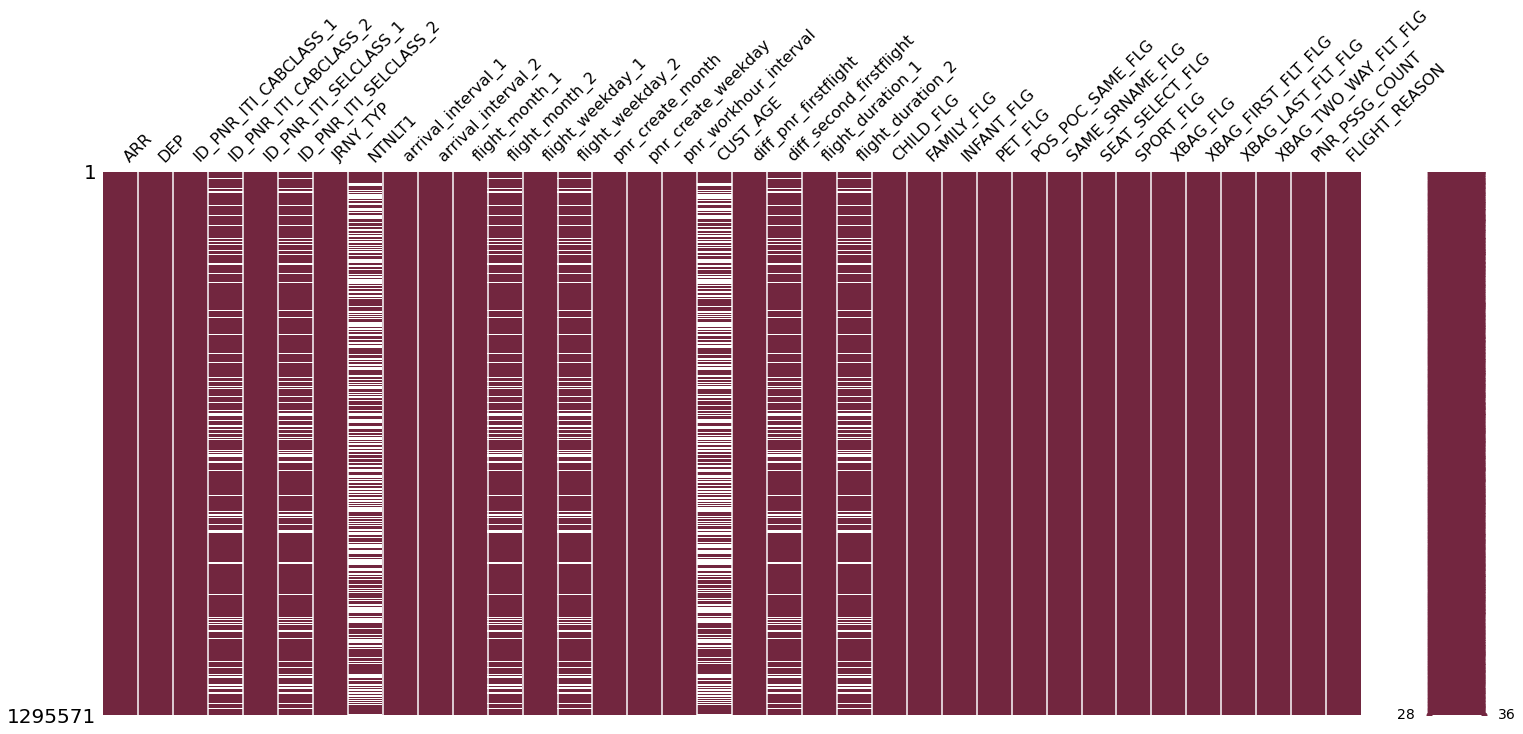

In [51]:
#read in data here
msgn.matrix(merged_df,color=(0.45, 0.15, 0.25))

### drop duplicates

In [52]:
merged_df.shape

(1295571, 36)

In [53]:
tmp_df = merged_df.copy()
tmp_df['values_nolabel']  = merged_df.drop(['FLIGHT_REASON'], axis=1).applymap(str).apply(' '.join, axis=1)
tmp_df['values_label']  = merged_df.applymap(str).apply(' '.join, axis=1)

In [54]:
conflicts_indexes = set(merged_df.drop_duplicates().index).difference(set(merged_df.drop_duplicates(subset=categorical_str+categorical_int+numerical+passthrough).index))
conflicts_indexes

{566526, 807898, 1110212, 1201984, 1226264, 1247613, 1260318}

In [55]:
all_conflict_indexes = []
for ind in conflicts_indexes:
    print(tmp_df[tmp_df['values_nolabel'] == tmp_df.loc[ind, 'values_nolabel']]['FLIGHT_REASON'])
    all_conflict_indexes.extend(list(tmp_df[tmp_df['values_nolabel'] == tmp_df.loc[ind, 'values_nolabel']].index))
    print('---')

898909      LEISURE
1201984    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
343581     BUSINESS
343703     BUSINESS
1110212     LEISURE
Name: FLIGHT_REASON, dtype: object
---
868592      LEISURE
1260318    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
980116      LEISURE
1226264    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
638445     LEISURE
807898    BUSINESS
Name: FLIGHT_REASON, dtype: object
---
357281         LEISURE
357282         LEISURE
1247613    SECOND HOME
Name: FLIGHT_REASON, dtype: object
---
343385     LEISURE
566526    BUSINESS
Name: FLIGHT_REASON, dtype: object
---


In [56]:
len(all_conflict_indexes)

16

In [57]:
# dropping conflicts
merged_df.drop(all_conflict_indexes, inplace=True)

In [58]:
# dropping duplicates
merged_df.drop_duplicates(inplace=True)

In [59]:
merged_df.shape

(953645, 36)

In [60]:
merged_df['FLIGHT_REASON'].value_counts()

BUSINESS       431001
LEISURE        290457
SECOND HOME    231130
STUDENT          1057
Name: FLIGHT_REASON, dtype: int64

### correlation

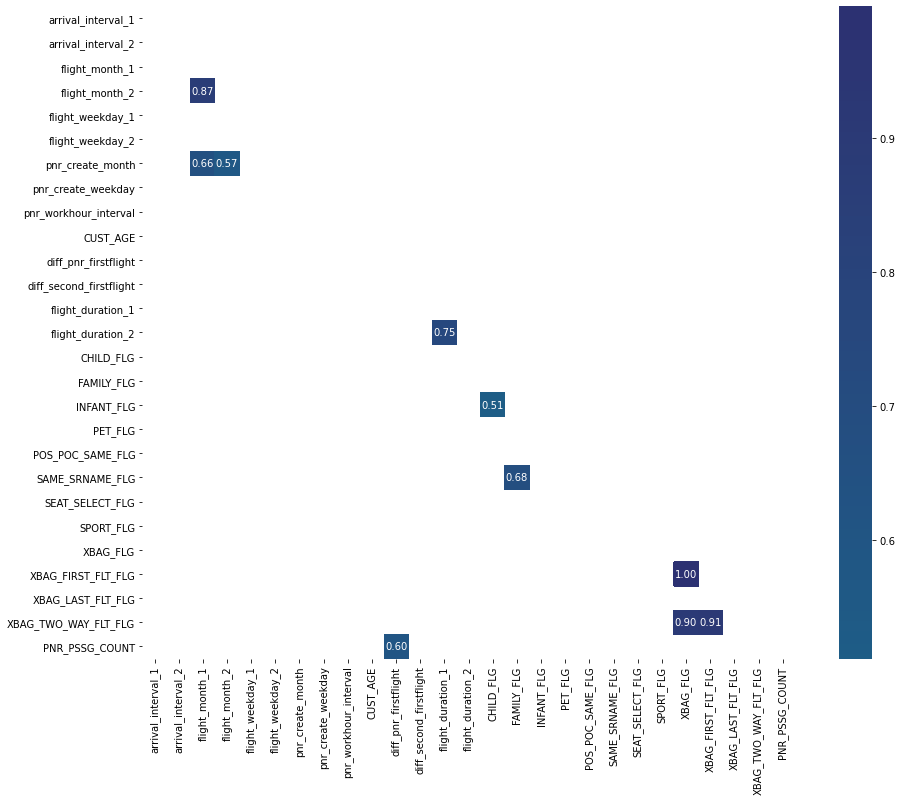

In [61]:
matrix = merged_df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

In [62]:
# dropping 'XBAG_FLG' because high correlation
merged_df.drop(['XBAG_FLG'], axis=1, inplace=True)
passthrough.remove('XBAG_FLG')

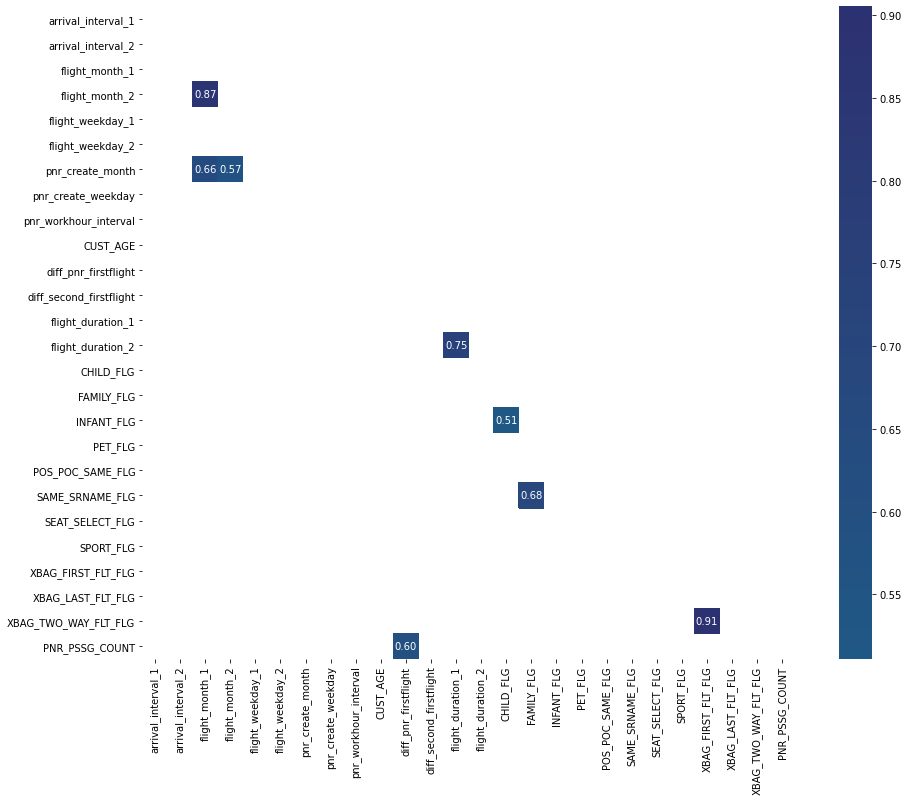

In [63]:
matrix = merged_df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

## eda and visualizations

<AxesSubplot:>

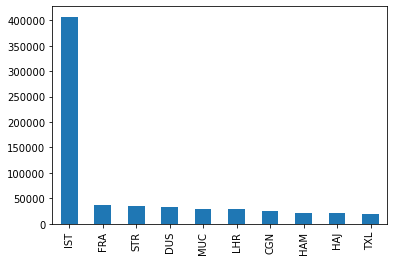

In [64]:
merged_df['DEP'].value_counts().nlargest(10).plot(kind='bar')

<AxesSubplot:>

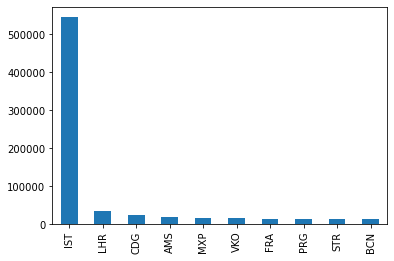

In [65]:
merged_df['ARR'].value_counts().nlargest(10).plot(kind='bar')

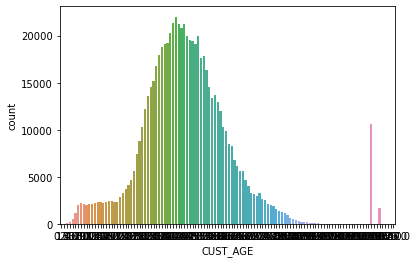

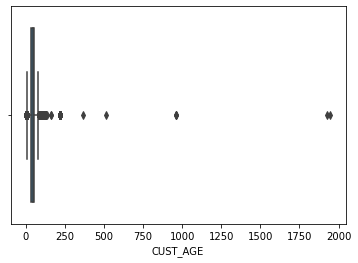

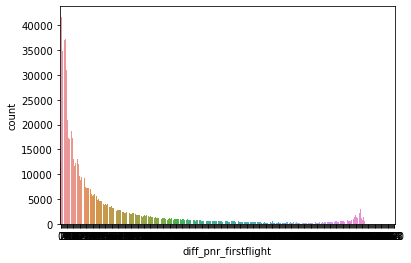

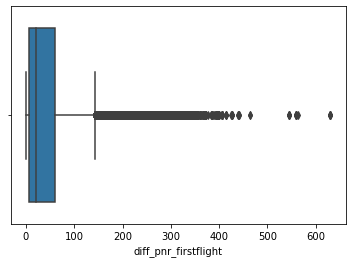

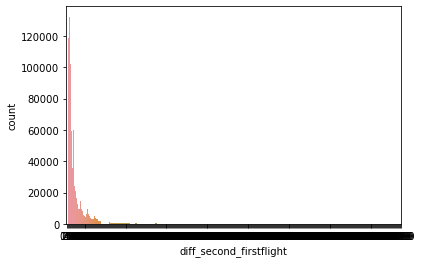

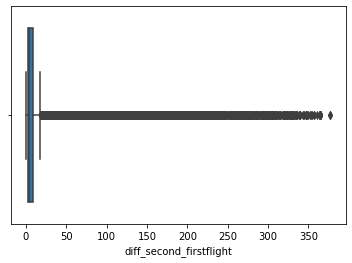

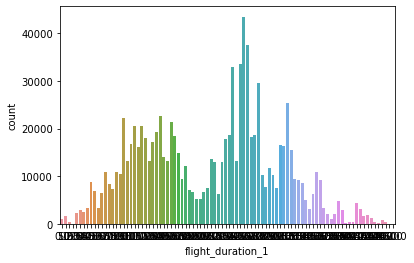

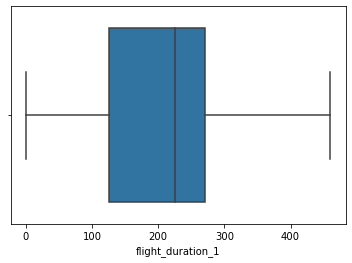

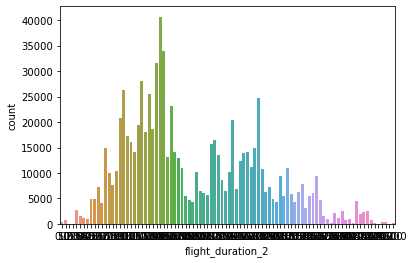

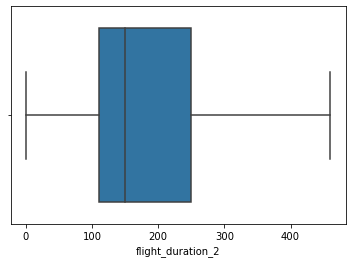

In [66]:
for i, col in enumerate(numerical):

    plt.figure(2*i)
    sns.countplot(x=col, data=merged_df)

    plt.figure(2*i+1)
    sns.boxplot(x=col, data=merged_df)


In [67]:
merged_df[merged_df['CUST_AGE']>120]['CUST_AGE']

14         121.0
56         121.0
130        121.0
258        221.0
569        121.0
           ...  
1293967    121.0
1294110    221.0
1294157    221.0
1294242    121.0
1295218    221.0
Name: CUST_AGE, Length: 12364, dtype: float64

In [68]:
merged_df[merged_df['diff_pnr_firstflight']>365]['diff_pnr_firstflight']

51830      405
51852      405
77749      396
123998     389
189386     559
          ... 
1212413    369
1212682    369
1221615    399
1221616    399
1248279    387
Name: diff_pnr_firstflight, Length: 125, dtype: int64

In [69]:
merged_df[merged_df['flight_duration_1']>400]['flight_duration_1']

2394       425.0
2781       420.0
2871       405.0
3428       410.0
3429       410.0
           ...  
1289388    415.0
1290932    410.0
1290952    405.0
1290955    405.0
1290971    425.0
Name: flight_duration_1, Length: 13823, dtype: float64

array([[<AxesSubplot:title={'center':'arrival_interval_1'}>,
        <AxesSubplot:title={'center':'arrival_interval_2'}>,
        <AxesSubplot:title={'center':'flight_month_1'}>],
       [<AxesSubplot:title={'center':'flight_month_2'}>,
        <AxesSubplot:title={'center':'flight_weekday_1'}>,
        <AxesSubplot:title={'center':'flight_weekday_2'}>],
       [<AxesSubplot:title={'center':'pnr_create_month'}>,
        <AxesSubplot:title={'center':'pnr_create_weekday'}>,
        <AxesSubplot:title={'center':'pnr_workhour_interval'}>]],
      dtype=object)

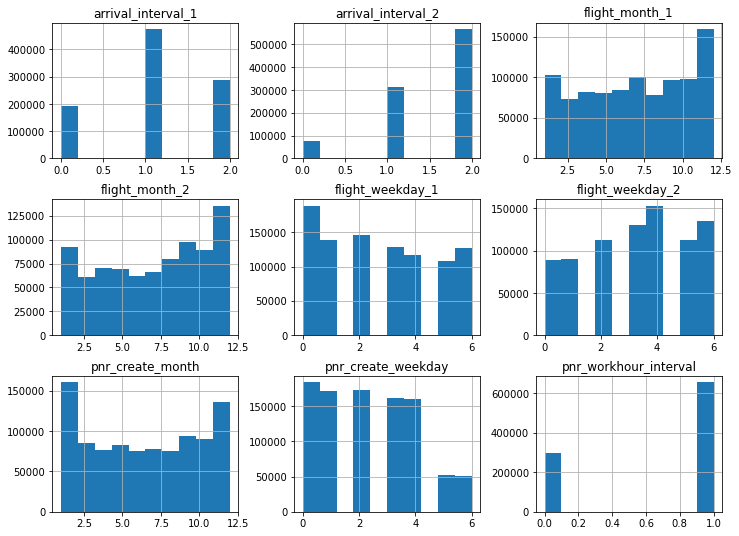

In [70]:
merged_df[categorical_int].hist(figsize=(12,9))

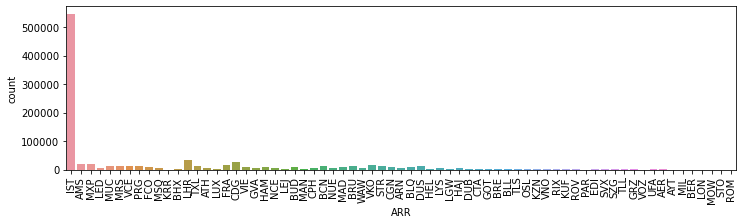

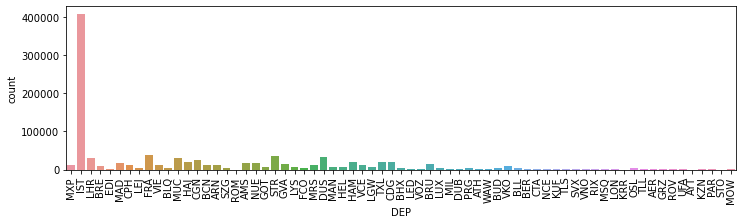

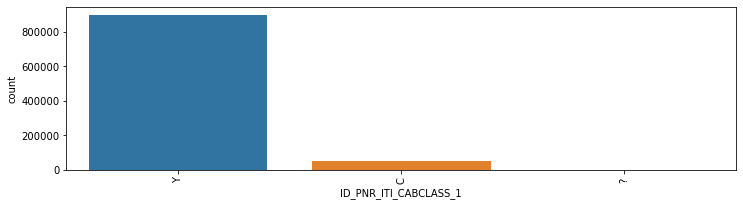

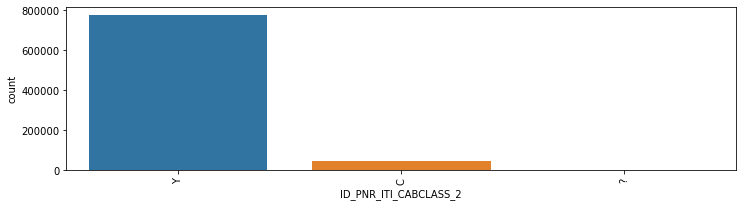

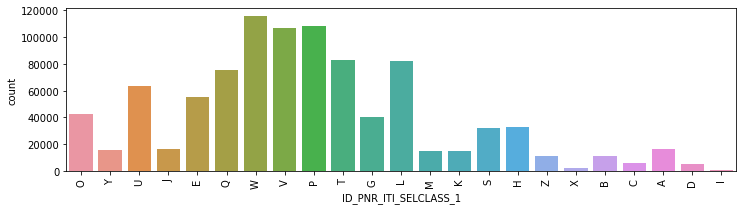

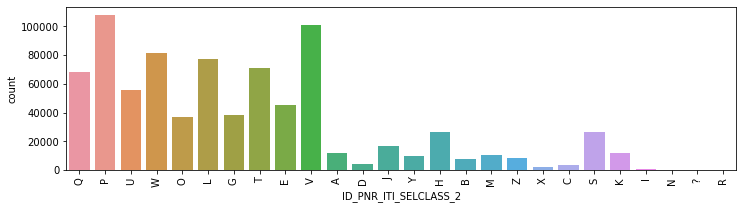

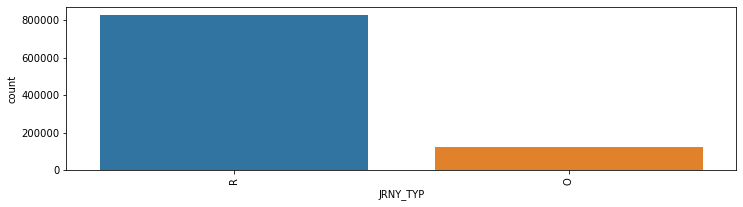

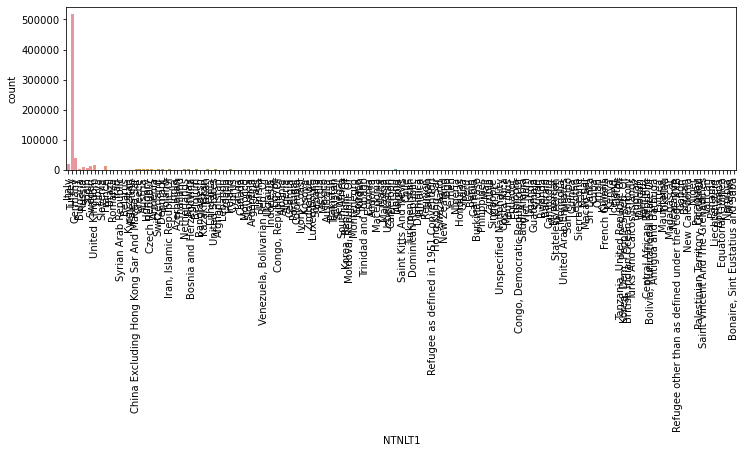

In [71]:
for i, col in enumerate(categorical_str):

    plt.figure(2*i, figsize=(12,3))
    ax = sns.countplot(x=col, data=merged_df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

<AxesSubplot:>

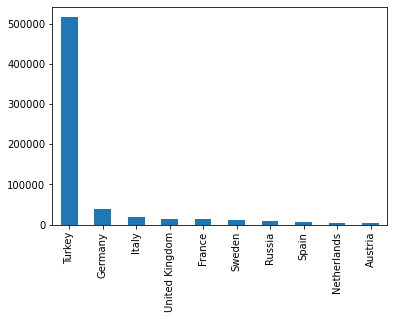

In [72]:
merged_df['NTNLT1'].value_counts()[0:10].plot(kind='bar')

## eda for numerical features

In [73]:
iata_country = pd.read_excel('airport_country.xls', index_col='Unnamed: 0')
airport_country_pairs = dict(zip(iata_country['IATA'], iata_country['Country']))

In [74]:
# is the customer's nationality same with its departure country
merged_df['dep_nat_flag'] = (merged_df['DEP'].map(airport_country_pairs) == merged_df['NTNLT1']).map({True:1, False:0})
# is the customer's nationality same with its arrival country
merged_df['arr_nat_flag'] = (merged_df['ARR'].map(airport_country_pairs) == merged_df['NTNLT1']).map({True:1, False:0})

In [75]:
merged_df['dep_nat_flag'].value_counts()

0    571304
1    382341
Name: dep_nat_flag, dtype: int64

In [76]:
merged_df['arr_nat_flag'].value_counts()

0    697879
1    255766
Name: arr_nat_flag, dtype: int64

In [77]:
merged_df['FLIGHT_REASON'].value_counts()

BUSINESS       431001
LEISURE        290457
SECOND HOME    231130
STUDENT          1057
Name: FLIGHT_REASON, dtype: int64

## cleaning outliers

In [87]:
merged_df.shape

(941160, 37)

In [79]:
# removing outliers
removed_indexes = []
removed_indexes.extend(merged_df[merged_df['CUST_AGE']>120].index)
removed_indexes.extend(merged_df[merged_df['diff_pnr_firstflight']>365].index)
removed_indexes.extend(merged_df[merged_df['diff_second_firstflight']>365].index)

# number of instances that will be removed
len(removed_indexes)

12491

In [85]:
merged_df.drop(removed_indexes, inplace=True)

In [86]:
merged_df.isna().sum()

ARR                             0
DEP                             0
ID_PNR_ITI_CABCLASS_1           0
ID_PNR_ITI_CABCLASS_2      126438
ID_PNR_ITI_SELCLASS_1           0
ID_PNR_ITI_SELCLASS_2      126438
JRNY_TYP                        0
NTNLT1                     269937
arrival_interval_1              0
arrival_interval_2              0
flight_month_1                  0
flight_month_2             126438
flight_weekday_1                0
flight_weekday_2           126438
pnr_create_month                0
pnr_create_weekday              0
pnr_workhour_interval           0
CUST_AGE                   260750
diff_pnr_firstflight            0
diff_second_firstflight    126438
flight_duration_1               0
flight_duration_2          126438
CHILD_FLG                       0
FAMILY_FLG                      0
INFANT_FLG                      0
PET_FLG                         0
POS_POC_SAME_FLG                0
SAME_SRNAME_FLG                 0
SEAT_SELECT_FLG                 0
SPORT_FLG     

In [88]:
merged_df.describe()

,arrival_interval_1,arrival_interval_2,flight_month_1,flight_month_2,flight_weekday_1,flight_weekday_2,pnr_create_month,pnr_create_weekday,pnr_workhour_interval,CUST_AGE,...,POS_POC_SAME_FLG,SAME_SRNAME_FLG,SEAT_SELECT_FLG,SPORT_FLG,XBAG_FIRST_FLT_FLG,XBAG_LAST_FLT_FLG,XBAG_TWO_WAY_FLT_FLG,PNR_PSSG_COUNT,dep_nat_flag,arr_nat_flag
count,941160.000000,941160.000000,941160.000000,814722.000000,941160.000000,814722.000000,941160.000000,941160.000000,941160.000000,680410.000000,...,941160.000000,941160.000000,941160.000000,941160.000000,941160.000000,941160.000000,941160.000000,941160.000000,941160.000000,941160.000000
mean,1.098874,1.516032,6.929398,6.975959,2.705520,3.276281,6.404016,2.313402,0.686248,43.797472,...,0.169691,0.396603,0.011184,0.000114,0.011930,0.000024,0.009805,5.055199,0.402219,0.265348
std,0.702071,0.637228,3.234771,3.258093,2.050561,1.916627,3.391390,1.740158,0.464017,13.988784,...,0.375361,0.489193,0.105162,0.010662,0.108571,0.004943,0.098533,9.702611,0.490346,0.441519
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,1.000000,0.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,7.000000,7.000000,3.000000,3.000000,6.000000,2.000000,1.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,10.000000,10.000000,4.000000,5.000000,9.000000,4.000000,1.000000,52.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
max,2.000000,2.000000,12.000000,12.000000,6.000000,6.000000,12.000000,6.000000,1.000000,120.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000


In [89]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941160 entries, 0 to 1295570
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ARR                      941160 non-null  object 
 1   DEP                      941160 non-null  object 
 2   ID_PNR_ITI_CABCLASS_1    941160 non-null  object 
 3   ID_PNR_ITI_CABCLASS_2    814722 non-null  object 
 4   ID_PNR_ITI_SELCLASS_1    941160 non-null  object 
 5   ID_PNR_ITI_SELCLASS_2    814722 non-null  object 
 6   JRNY_TYP                 941160 non-null  object 
 7   NTNLT1                   671223 non-null  object 
 8   arrival_interval_1       941160 non-null  int64  
 9   arrival_interval_2       941160 non-null  int64  
 10  flight_month_1           941160 non-null  int64  
 11  flight_month_2           814722 non-null  float64
 12  flight_weekday_1         941160 non-null  int64  
 13  flight_weekday_2         814722 non-null  float64
 14  pnr

In [90]:
# checking new dataframe again, in case of missing something
for col in merged_df.columns:
    print(merged_df[col].describe())
    print('------------------------')

count     941160
unique        69
top          IST
freq      536541
Name: ARR, dtype: object
------------------------
count     941160
unique        69
top          IST
freq      402714
Name: DEP, dtype: object
------------------------
count     941160
unique         3
top            Y
freq      886808
Name: ID_PNR_ITI_CABCLASS_1, dtype: object
------------------------
count     814722
unique         3
top            Y
freq      769222
Name: ID_PNR_ITI_CABCLASS_2, dtype: object
------------------------
count     941160
unique        23
top            W
freq      112108
Name: ID_PNR_ITI_SELCLASS_1, dtype: object
------------------------
count     814722
unique        26
top            P
freq      106872
Name: ID_PNR_ITI_SELCLASS_2, dtype: object
------------------------
count     941160
unique         2
top            R
freq      819457
Name: JRNY_TYP, dtype: object
------------------------
count     671223
unique       178
top       Turkey
freq      508370
Name: NTNLT1, dtype: object
-

everything seems normal, we just have some null values but arised because of absence of second flight

In [92]:
merged_df['FLIGHT_REASON'].value_counts()

BUSINESS       428672
LEISURE        285105
SECOND HOME    226326
STUDENT          1057
Name: FLIGHT_REASON, dtype: int64

In [91]:
merged_df.to_csv('train.csv')